In [14]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [15]:
# sexo (cap)

In [24]:
def tratamento_dataset(dataset,colunas_remocao,nomes_colunas): 
    dataset.dropna(inplace=True)
    dataset.drop(columns=dataset.columns[colunas_remocao],inplace=True)

    dataset.columns = nomes_colunas

    dataset.drop(dataset.iloc[0:1].index,inplace=True)
    selecao = (dataset['Estado/Cidade'] == 'Norte (1)') | (dataset['Estado/Cidade'] == 'Nordeste') | (dataset['Estado/Cidade'] == 'Sudeste (1)') | (dataset['Estado/Cidade'] == 'Centro-Oeste (1)') | (dataset['Estado/Cidade'] == 'Sul (1)')
    dataset.drop(dataset[selecao].index,inplace=True)
    dataset.reset_index(drop=True,inplace=True)

    dataset.loc[0:7, 'Região'] = 'Norte'
    dataset.loc[7:16, 'Região'] = 'Nordeste'
    dataset.loc[16:20, 'Região'] = 'Sudeste'
    dataset.loc[20:23, 'Região'] = 'Sul'
    dataset.loc[23:, 'Região'] = 'Centro-Oeste'

    return dataset
    

tab3_44_sexCap = pd.read_excel('dados_depressao/3.44.xls',sheet_name='sexo (cap)')
colunas_remocao = [2,3,5,6,8,9]
nomes_colunas = ['Estado/Cidade','Diagnostico Depressão Total','Masculino','Feminino']
tab3_44_sexCap = tratamento_dataset(tab3_44_sexCap,colunas_remocao,nomes_colunas)
tab3_44_sexCap = tab3_44_sexCap.loc[[8]]
tab3_44_sexCap

,Estado/Cidade,Diagnostico Depressão Total,Masculino,Feminino,Região
8,São Luís,4.3,3.7,4.8,Nordeste


In [25]:
def tratamento_dataset(dataset,colunas_remocao,nomes_colunas): 
    dataset.dropna(inplace=True)
    dataset.drop(columns=dataset.columns[colunas_remocao],inplace=True)

    dataset.columns = nomes_colunas

    dataset.drop(dataset.iloc[0:3].index,inplace=True)
    selecao = (dataset['Estado/Cidade'] == 'Norte') | (dataset['Estado/Cidade'] == 'Nordeste') | (dataset['Estado/Cidade'] == 'Sudeste') | (dataset['Estado/Cidade'] == 'Centro-Oeste') | (dataset['Estado/Cidade'] == 'Sul')
    dataset.drop(dataset[selecao].index,inplace=True)
    dataset.reset_index(drop=True,inplace=True)

    dataset.loc[0:7, 'Região'] = 'Norte'
    dataset.loc[7:16, 'Região'] = 'Nordeste'
    dataset.loc[16:20, 'Região'] = 'Sudeste'
    dataset.loc[20:23, 'Região'] = 'Sul'
    dataset.loc[23:, 'Região'] = 'Centro-Oeste'

    return dataset
    

tab3_44_sexEst = pd.read_excel('dados_depressao/3.44.xls',sheet_name='sexo')
colunas_remocao = [2,3,5,6,8,9]
nomes_colunas = ['Estado/Cidade','Diagnostico Depressão Total','Masculino','Feminino']
tab3_44_sexEst = tratamento_dataset(tab3_44_sexEst,colunas_remocao,nomes_colunas)
tab3_44_sexEst =  tab3_44_sexEst.loc[[7]]
tab3_44_sexEst

,Estado/Cidade,Diagnostico Depressão Total,Masculino,Feminino,Região
7,Maranhão,5.4,2.4,8.2,Nordeste


In [26]:
dados_new = pd.concat([tab3_44_sexEst,tab3_44_sexCap])
dados_new.index = range(dados_new.shape[0])
dados_new.set_index('Estado/Cidade', inplace = True)
dados_new

,Diagnostico Depressão Total,Masculino,Feminino,Região
Estado/Cidade,,,,
Maranhão,5.4,2.4,8.2,Nordeste
São Luís,4.3,3.7,4.8,Nordeste


Text(0, 0.5, '% Total dos entrevistados')

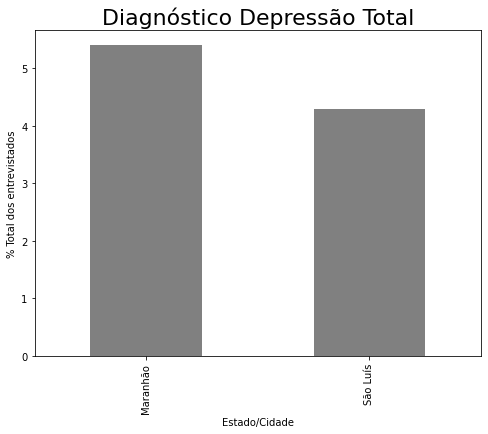

In [27]:
fig_1 = dados_new['Diagnostico Depressão Total'].plot.bar(color='gray')
fig_1.set_title('Diagnóstico Depressão Total', {'fontsize':22})
fig_1.set_ylabel('% Total dos entrevistados')

In [28]:
fig_2 = dados_new['Diagnostico Depressão Masculino'].plot.bar()
fig_2.set_title('Diagnóstico Depressão Masculino', {'fontsize':22})
fig_2.set_ylabel('% Total dos entrevistados')

KeyError: 'Diagnostico Depressão Masculino'

In [29]:
fig_3 = dados_new['Diagnostico Depressão Feminino'].plot.bar(color = 'goldenrod')
fig_3.set_title('Diagnóstico Depressão Feminino', {'fontsize':22})
fig_3.set_ylabel('% Total dos entrevistados')

KeyError: 'Diagnostico Depressão Feminino'

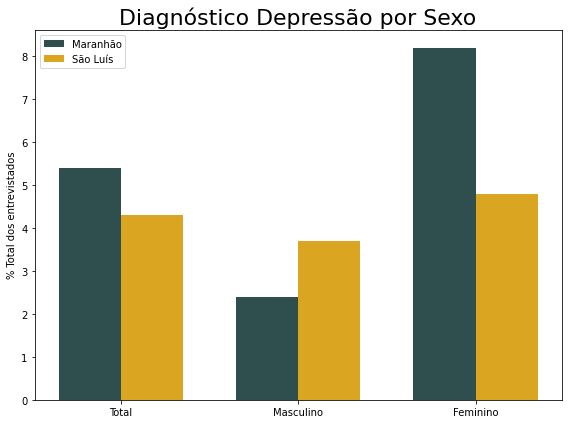

In [30]:
labels = ['Total','Masculino','Feminino']
ma = [dados_new.iloc[0,0], dados_new.iloc[0,1], dados_new.iloc[0,2]]
slz = [dados_new.iloc[1,0], dados_new.iloc[1,1], dados_new.iloc[1,2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ma, width, color = 'darkslategray', label='Maranhão')
rects2 = ax.bar(x + width/2, slz, width, color = 'goldenrod', label='São Luís')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Total dos entrevistados')
ax.set_title('Diagnóstico Depressão por Sexo', {'fontsize':22})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.rc('figure', figsize = (8,6))
plt.show()

In [35]:
fig = px.bar(dados_new, x='Estado/Cidade',y=['Diagnostico Depressão Total','Masculino','Feminino'],color='Região',text="Diagnostico Depressão")
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20))
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Diagnostico Depressão Total', 'Masculino', 'Feminino', 'Região'] but received: Estado/Cidade